In [2]:
# Install required packages
# pip install langgraph langchain-google-genai

import os
from typing import Annotated, Sequence, TypedDict
from langchain_core.messages import BaseMessage, HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI
from langgraph.graph import StateGraph, END
from langgraph.graph.message import add_messages
from IPython.display import Image, display
from dotenv import load_dotenv

E0000 00:00:1760929893.912332    6093 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.


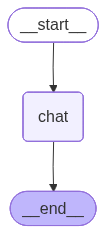

In [4]:



# Set your API key
load_dotenv(".env")

# Set your API key
os.environ["GOOGLE_API_KEY"] = os.getenv("GOOGLE_API_KEY")

# Define the state
class ChatState(TypedDict):
    """The state of the chat."""
    messages: Annotated[Sequence[BaseMessage], add_messages]

# Initialize Gemini model
llm = ChatGoogleGenerativeAI(
    model="gemini-2.0-flash-exp",
    temperature=0.7,
    max_retries=2,
)

# Define the chat node
def chat_node(state: ChatState):
    """Process messages with Gemini."""
    response = llm.invoke(state["messages"])
    return {"messages": [response]}

# Create the graph
workflow = StateGraph(ChatState)

# Add the chat node
workflow.add_node("chat", chat_node)

# Set entry point and edges
workflow.set_entry_point("chat")
workflow.add_edge("chat", END)

# Compile the graph
graph = workflow.compile()
display(Image(graph.get_graph().draw_mermaid_png()))


In [5]:

# Run the graph
if __name__ == "__main__":
    # Create initial message
    inputs = {"messages": [HumanMessage(content="Hello! Tell me about LangGraph.")]}
    
    # Stream the response
    for state in graph.stream(inputs, stream_mode="values"):
        last_message = state["messages"][-1]
        print(f"{last_message.type}: {last_message.content}\n")


human: Hello! Tell me about LangGraph.

ai: Okay, let's dive into LangGraph!

**What is LangGraph?**

LangGraph is a framework built on top of LangChain that makes it easier to build **stateful, multi-actor applications** using Large Language Models (LLMs). Think of it as a way to orchestrate and manage complex conversations and interactions between LLMs, human agents, and other tools in a more structured and reliable way. It provides a graph-based structure to define the flow of your application.

**Key Concepts & Features:**

*   **Graph-Based Structure:**  The core idea is to represent your application's logic as a directed graph.  Nodes in the graph represent different steps or states in your application (e.g., a prompt to an LLM, a tool call, a human input).  Edges define the transitions between these states. This graph structure makes it easier to visualize, understand, and debug complex conversational flows.
*   **State Management:**  LangGraph provides a built-in mechanism for 